In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'


In [3]:
frozen_model = r"C:\Users\91966\anaconda3\Frozen\frozen_inference_graph.pb"
config_file = r"C:\Users\91966\anaconda3\Frozen\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"


In [4]:
import os
print(os.path.exists(frozen_model))



True


In [5]:
import cv2
print(cv2.__version__)


4.11.0


In [6]:
pip install --upgrade opencv-python opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [7]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [9]:
classLabels = []
file_name = r'C:\Users\91966\anaconda3\Frozen\labels.txt'  # Use raw string (r'') to avoid escape issues
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [10]:
print(classLabels)


['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
print(len(classLabels))


80


In [12]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000014004894D70>

In [17]:
img_path = r"C:\Users\91966\anaconda3\Frozen\boy-2662495_1280.jpg"
img = cv2.imread(img_path)

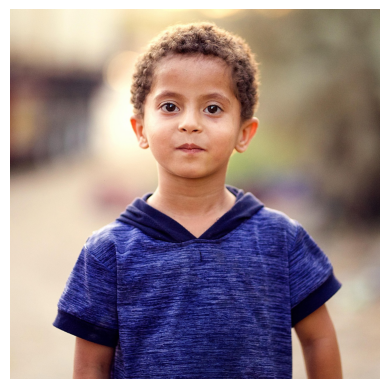

In [26]:


# Use the full file path with raw string (r" ") to avoid escape sequence issues
img_path = r"C:\Users\91966\anaconda3\Frozen\boy-2662495_1280.jpg"
img = cv2.imread(img_path)

# Check if the image is loaded correctly
if img is not None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes for a cleaner image
    plt.show()
else:
    print(f"Error: Could not load image at {img_path}. Check the file path!")


In [27]:
import cv2

img_path = r"C:\Users\91966\anaconda3\Frozen\boy-2662495_1280.jpg"
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Could not load image at {img_path}. Check the file path!")
else:
    print("Image loaded successfully!")


Image loaded successfully!


In [28]:
if model is None:
    print("Error: Model is not initialized. Check model loading!")


In [29]:
img_resized = cv2.resize(img, (640, 480))  # Adjust size based on model requirement
ClassIndex, confidence, bbox = model.detect(img_resized, confThreshold=0.5)


In [30]:
print(ClassIndex)

[1]


In [31]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, box, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (box[0] + 10, box[1] + 40), font, font_scale, (0, 255, 0), thickness=3)

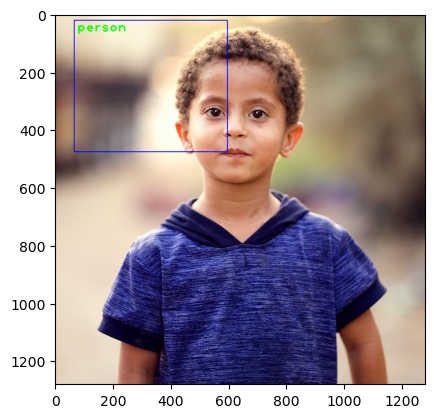

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Video Object Detection
# --------------------------

cap = cv2.VideoCapture('5330833-hd_1920_1080_30fps.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Open webcam if video fails

if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break if the video ends
   

In [ ]:
 
    # Object detection on frame
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:  # To ensure class index is within range
                cv2.putText(frame, classLabels[ClassInd - 1], (box[0] + 10, box[1] + 40), 
                            font, font_scale, (0, 255, 0), thickness=3)
                cv2.rectangle(frame, box, (255, 0, 0), 2)

    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()